In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [112]:
color_palette = [[0, 0, 0],
                [255, 255, 255],
                [178, 31, 52],
                [216, 39, 53],
                [255, 116, 53],
                [255, 161, 53],
                [255, 203, 53],
                [255, 240, 53],
                [0, 117, 58],
                [0, 158, 71],
                [22, 221, 53],
                [0, 82, 165],
                [0, 121, 231],
                [0, 169, 252],
                [104, 30, 126],
                [125, 60, 181],
                [189, 122, 246],
                ]

def create_palette(red, green, blue):
    total_dist = 500
    final_val = []
    for color in color_palette:
        dist = abs(np.linalg.norm(np.array([red, green, blue] - np.array(color))))
        if dist < total_dist:
            total_dist = dist
            final_val = color
    return final_val

def pad_images(image, filter_size):
    p = int((filter_size - 1)/2)
    image = np.pad(array=image, pad_width=p, mode='constant', constant_values=0)
    return image

def create_dataset(gray, red, green, blue, f_s):
    X = []
    y = []
    p_gray = pad_images(gray, f_s)
    p_red = pad_images(red, f_s)
    p_green = pad_images(green, f_s)
    p_blue = pad_images(blue, f_s)
    
    for i in range(0, len(p_gray)-(f_s-1)):
        for j in range(0, len(p_gray)-(f_s-1)):
            X.append(list(p_gray[i:i+f_s,j:j+f_s].flatten()))
            temp_r = p_red[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]
            temp_g = p_green[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]
            temp_b = p_blue[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]
            r, g, b = create_palette(temp_r, temp_g, temp_b)          
            y.append([r,g,b])
    
    return X, y
    
def get_images(directory, f_s):
    exts = ["jpg", "jpeg", "png"]
    print("Opening directory {}".format(directory))
    for root, dirs, files in os.walk(directory):
        if root:
            X = []
            y = []
            file_name = []
            for f in files:
                if f.split(".")[1] in exts:
                    print("Accessging ", f)
                    image = cv2.imread(os.path.join(root, f))
                    image = cv2.resize(image, (500,500), interpolation = cv2.INTER_AREA)
                    # gray image
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # red, green, blue components
                    red, green, blue = image[:,:,2], image[:,:,1], image[:,:,0]
                    m_X, m_y = create_dataset(gray, red, green, blue, f_s)
                
                    X.append(m_X)
                    y.append(m_y)
                    file_name.append(f)
    return X, y, file_name
                
def align_data(X, y):
    data_X = []
    for sublist in X:
        for item in sublist:
            data_X.append(item)

    data_y_red = []
    data_y_green = []
    data_y_blue = []

    for sublist in y:
        for item in sublist:
            data_y_red.append(item[0])
            data_y_green.append(item[1])
            data_y_blue.append(item[2])
            
    return data_X, data_y_red, data_y_green, data_y_blue

In [113]:
directory = "./Images/"
filter_size = 13
X, y, files = get_images(directory, filter_size)
data_X, data_y_red, data_y_green, data_y_blue = align_data(X, y)

Opening directory ./Images/
Accessging  scene8.jpeg
Accessging  scene10.jpeg
Accessging  scene9.jpeg
Accessging  scene2.jpeg
Accessging  scene1.jpeg
Accessging  scene5.jpeg
Accessging  scene3.jpeg
Accessging  scene7.jpeg
Accessging  scene6.jpeg
Accessging  scene10.jpeg


In [114]:
# Model for red
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data_X, data_y_red, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_r)

X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

mlp_r = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=1000, alpha=0.003, verbose=True)
mlp_r.fit(X_train_r,y_train_r)

Iteration 1, loss = 1912.59537004
Iteration 2, loss = 362.51081183
Iteration 3, loss = 315.13032209
Iteration 4, loss = 292.17308109
Iteration 5, loss = 279.60645098
Iteration 6, loss = 271.76493822
Iteration 7, loss = 265.84905272
Iteration 8, loss = 261.50652890
Iteration 9, loss = 257.22917620
Iteration 10, loss = 252.58008117
Iteration 11, loss = 250.04474396
Iteration 12, loss = 248.08427143
Iteration 13, loss = 244.71944875
Iteration 14, loss = 242.77029345
Iteration 15, loss = 239.94506601
Iteration 16, loss = 238.28130660
Iteration 17, loss = 237.40969879
Iteration 18, loss = 236.38325257
Iteration 19, loss = 234.86972892
Iteration 20, loss = 235.65441904
Iteration 21, loss = 233.09339719
Iteration 22, loss = 231.93468399
Iteration 23, loss = 231.24156744
Iteration 24, loss = 230.36746253
Iteration 25, loss = 229.28296140
Iteration 26, loss = 229.57137300
Iteration 27, loss = 227.99353083
Iteration 28, loss = 227.32227586
Iteration 29, loss = 226.96586742
Iteration 30, loss = 2

Iteration 239, loss = 158.59976193
Iteration 240, loss = 159.77863707
Iteration 241, loss = 158.10612755
Iteration 242, loss = 157.88168771
Iteration 243, loss = 157.74872906
Iteration 244, loss = 157.04839788
Iteration 245, loss = 158.77193942
Iteration 246, loss = 157.59610454
Iteration 247, loss = 157.50070659
Iteration 248, loss = 158.60769867
Iteration 249, loss = 157.86902799
Iteration 250, loss = 158.64121391
Iteration 251, loss = 158.34224086
Iteration 252, loss = 157.29972978
Iteration 253, loss = 157.03394592
Iteration 254, loss = 157.54949565
Iteration 255, loss = 156.96843274
Iteration 256, loss = 156.18153756
Iteration 257, loss = 156.95855536
Iteration 258, loss = 157.56907141
Iteration 259, loss = 156.92606214
Iteration 260, loss = 156.68153355
Iteration 261, loss = 156.31266241
Iteration 262, loss = 156.41539820
Iteration 263, loss = 157.12602606
Iteration 264, loss = 156.50294553
Iteration 265, loss = 156.20835944
Iteration 266, loss = 154.48691551
Iteration 267, loss 

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [115]:
predictions_r = mlp_r.predict(X_test_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


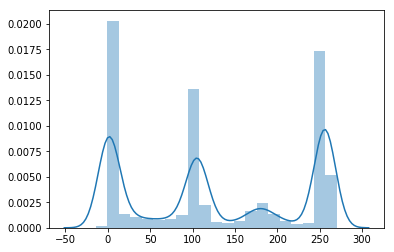

In [116]:
sns.distplot(predictions_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


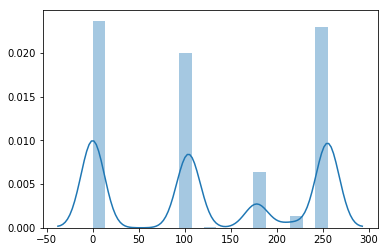

In [117]:
sns.distplot(y_test_r)

In [118]:
# Model for green
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(data_X, data_y_green, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_g)

X_train_g = scaler.transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

mlp_g = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=1000, alpha=0.003, verbose=True)
mlp_g.fit(X_train_g,y_train_g)

Iteration 1, loss = 760.10823045
Iteration 2, loss = 324.80676928
Iteration 3, loss = 288.07303353
Iteration 4, loss = 267.82008942
Iteration 5, loss = 253.71259043
Iteration 6, loss = 240.68075014
Iteration 7, loss = 232.85817155
Iteration 8, loss = 226.57665846
Iteration 9, loss = 221.98147633
Iteration 10, loss = 217.83254181
Iteration 11, loss = 213.24704697
Iteration 12, loss = 212.82497446
Iteration 13, loss = 207.48797364
Iteration 14, loss = 204.23489837
Iteration 15, loss = 201.87040271
Iteration 16, loss = 199.29470699
Iteration 17, loss = 196.49899822
Iteration 18, loss = 192.98303817
Iteration 19, loss = 193.93866481
Iteration 20, loss = 189.27450496
Iteration 21, loss = 188.69461371
Iteration 22, loss = 188.87751057
Iteration 23, loss = 185.79005504
Iteration 24, loss = 185.41733787
Iteration 25, loss = 183.52233827
Iteration 26, loss = 181.66851789
Iteration 27, loss = 182.85108465
Iteration 28, loss = 179.45545182
Iteration 29, loss = 179.88338056
Iteration 30, loss = 17

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [119]:
predictions_g = mlp_g.predict(X_test_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


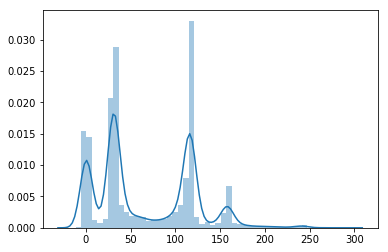

In [120]:
sns.distplot(predictions_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


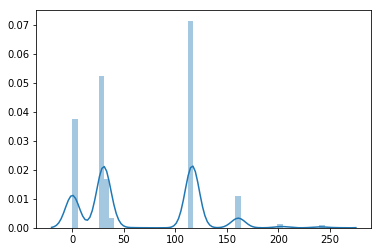

In [121]:
sns.distplot(y_test_g)

In [122]:
# Model for blue
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_X, data_y_blue, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_b)

X_train_b = scaler.transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

mlp_b = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=1000, alpha=0.003, verbose=True)
mlp_b.fit(X_train_b,y_train_b)

Iteration 1, loss = 747.08750331
Iteration 2, loss = 185.40814312
Iteration 3, loss = 167.67288585
Iteration 4, loss = 158.27472098
Iteration 5, loss = 151.81693052
Iteration 6, loss = 147.49404681
Iteration 7, loss = 142.68867243
Iteration 8, loss = 138.70250057
Iteration 9, loss = 136.87949213
Iteration 10, loss = 134.12459351
Iteration 11, loss = 131.97153300
Iteration 12, loss = 130.44416686
Iteration 13, loss = 128.85532352
Iteration 14, loss = 127.21530171
Iteration 15, loss = 125.68765688
Iteration 16, loss = 124.29910895
Iteration 17, loss = 123.45394062
Iteration 18, loss = 122.66192743
Iteration 19, loss = 121.63787868
Iteration 20, loss = 119.45075634
Iteration 21, loss = 118.88844729
Iteration 22, loss = 118.48852539
Iteration 23, loss = 117.92355197
Iteration 24, loss = 116.95925537
Iteration 25, loss = 115.38215965
Iteration 26, loss = 114.09324799
Iteration 27, loss = 114.03654987
Iteration 28, loss = 113.14375070
Iteration 29, loss = 112.79307465
Iteration 30, loss = 11

Iteration 244, loss = 74.67025571
Iteration 245, loss = 74.22786791
Iteration 246, loss = 74.64316338
Iteration 247, loss = 73.85410756
Iteration 248, loss = 73.49380395
Iteration 249, loss = 74.22189773
Iteration 250, loss = 73.55561183
Iteration 251, loss = 73.37661350
Iteration 252, loss = 73.30066288
Iteration 253, loss = 73.57328472
Iteration 254, loss = 74.13570287
Iteration 255, loss = 73.12022808
Iteration 256, loss = 74.23606780
Iteration 257, loss = 73.72892964
Iteration 258, loss = 73.73369998
Iteration 259, loss = 73.64812995
Iteration 260, loss = 74.05686262
Iteration 261, loss = 72.98335389
Iteration 262, loss = 73.42309478
Iteration 263, loss = 73.83686331
Iteration 264, loss = 73.40639160
Iteration 265, loss = 73.26221614
Iteration 266, loss = 73.79296800
Iteration 267, loss = 73.14692362
Iteration 268, loss = 73.40358492
Iteration 269, loss = 73.39152998
Iteration 270, loss = 72.94161094
Iteration 271, loss = 72.94280103
Iteration 272, loss = 72.52918035
Iteration 273,

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [123]:
predictions_b = mlp_b.predict(X_test_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


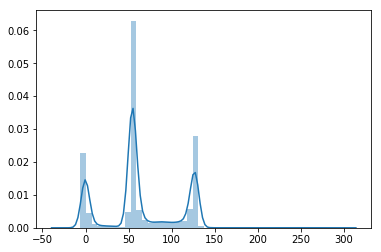

In [124]:
sns.distplot(predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


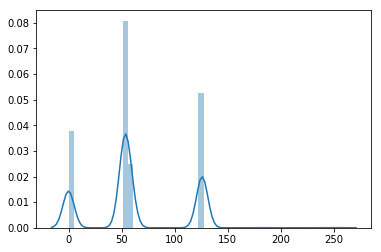

In [125]:
sns.distplot(y_test_b)

In [127]:
def bound_predictions(predictions_b, predictions_g, predictions_r):
    for i in range(len(predictions_g)):
        if predictions_b[i] < 0:
            predictions_b[i] = 0
        if predictions_b[i] > 255:
            predictions_b[i] = 255
        if predictions_g[i] < 0:
            predictions_g[i] = 0
        if predictions_g[i] > 255:
            predictions_g[i] = 255
        if predictions_r[i] < 0:
            predictions_r[i] = 0
        if predictions_r[i] > 255:
            predictions_r[i] = 255
    
        predictions_b[i] = int(predictions_b[i])
        predictions_g[i] = int(predictions_g[i])
        predictions_r[i] = int(predictions_r[i])
        
    return predictions_r, predictions_g, predictions_b

In [138]:
directory = "./Images/test"
filter_size = 13
X, y, files = get_images(directory, filter_size)
print(files)
data_X_test, data_y_red_test, data_y_green_test, data_y_blue_test = align_data(X, y)
data_X_test = scaler.transform(data_X_test)

Opening directory ./Images/test
Accessging  scene5.jpeg
['scene5.jpeg']


In [139]:
test_predictions_b = mlp_b.predict(data_X_test)
test_predictions_g = mlp_g.predict(data_X_test)
test_predictions_r = mlp_r.predict(data_X_test)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


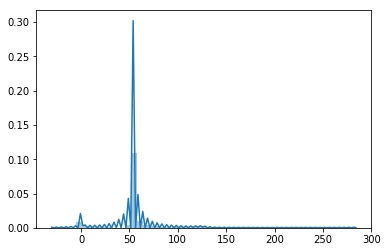

In [140]:
sns.distplot(test_predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


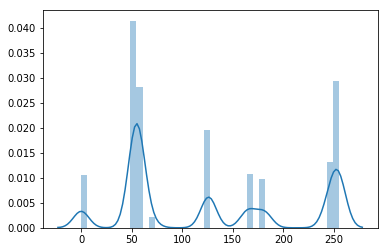

In [141]:
sns.distplot(data_y_blue_test)

In [142]:
test_predictions_b, test_predictions_g, test_predictions_r = bound_predictions(test_predictions_b, test_predictions_g, test_predictions_r)

In [143]:
test_predictions_b

array([ 90.,  22., 157., ..., 193.,  61., 190.])

In [144]:
for i in range(len(test_predictions_b)):
    color = create_palette(test_predictions_r[i], test_predictions_g[i], test_predictions_b[i])
    test_predictions_r[i] = color[0]
    test_predictions_g[i] = color[1]
    test_predictions_b[i] = color[2]
    
test_predictions_b

array([126.,  58., 181., ..., 181.,  52., 181.])

In [145]:
from PIL import Image

In [146]:
class Colorizer():
    def __init__(self, red_list, blue_list, green_list, image_location='./Images/test/scene5.jpeg'):
        self.im_size = (0, 0)
        self.image_loc = image_location
        self.image = None
        self.pix_object = None
        self.pixel_values = None
        self.red = red_list
        self.blue = blue_list
        self.green = green_list
        
    def extract_pixels(self):
        # Open the image
        self.image = Image.open(self.image_loc)
        # Load the image - Pixel object
        self.pix_object = self.image.load()
        # Size of the image - Number of rows * Number of columns
        self.im_size = self.image.size
        # Extract all the pixel values - Start from left corner (Moving from Left to Right)
        self.pixel_values = list(self.image.getdata())
        
    def create_image_from_array(self):
        
        w, h = 500, 500
        count = 0
        data = np.zeros((h, w, 3), dtype=np.uint8)
        
        for i in range(w):
            
            for j in range(h):
                
                data[i,j] = (int(self.red[count]), int(self.green[count]), int(self.blue[count]))
                count +=1
        
        img = Image.fromarray(data, 'RGB')
        img.save('palette1_v5.png')
        img.show()

In [147]:
new_color = Colorizer(red_list=test_predictions_r, blue_list=test_predictions_b, green_list=test_predictions_g)
new_color.extract_pixels()
new_color.create_image_from_array()
print("Done")

Done
